# Prepara o ambiente

In [3]:
import pandas as pd
import numpy as np
import scipy, statsmodels, seaborn, matplotlib
from scipy.stats import normaltest

In [4]:
path = "Engajamento de atividades em Pesquisa e Desenvolvimento.csv"

## Carregamento dos dados obtidos

In [5]:
pd.set_option('display.max_columns', None)
dados_all = pd.read_csv(path)

### Filtragem por pessoas que participaram de algum projeto

In [6]:
dados = dados_all[dados_all['Você já participou de algum projeto?'] == "Sim"]
dados.head()

,Carimbo de data/hora,Você já participou de algum projeto?,Em qual área você atuou no primeiro projeto?,Em que período você ingressou no Projeto?,Python,Java,JavaScript,Haskell,ProLog,SystemVerilog,C e C++,Bash,Assembly,Outro,HTML e CSS,React / React Native,NodeJS,"Django,Flask",Docker,Spring-boot,"Tensorflow, Pytorch, Scikit-learn",SQL,Microcontroladores,"PhotoShop, Canva, Figma, Adobe XD (UX / UI)",Linux,"AWS, Azure","P1, P2, LP1, LP2","Cálculo I e II, Linear, Vetorial",Probabilidade e estatística,"Daca, psoft, prog web, ES, Projeto 1, Projeto 2","ATAL, EDA, LEDA, AA","FMCC(I ou II), Lógica","IC, OAC, LOAC","TC, Compiladores",Análise de sistemas,"CDD, PLN, CDP, Redes neurais, IA, Percep. computacional","Redes, Segurança de sistemas, interconexões de Redes de Comp.","Na sua opinião, ter uma indicação de alguma pessoa (envolvida, ou não, nesse projeto), te proporcionou o ingresso de seu primeiro projeto?","Tudo correto, nas respostas anteriores?"
0,2022/03/09 4:59:43 PM GMT-3,Sim,Desenvolvimento de Sistemas,Sétimo Período,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,4.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,"Sim, tudo bem respondido."
1,2022/03/09 5:00:21 PM GMT-3,Sim,Inteligência artificial / Dados,Quarto Período,5.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,1.0,1.0,4.0,1.0,4.0,5.0,5.0,1.0,4.0,5.0,1.0,2.0,3.0,5.0,1.0,3.0,"Sim, tudo bem respondido."
2,2022/03/09 5:01:31 PM GMT-3,Sim,Inteligência artificial / Dados,Quinto Período,5.0,1.0,3.0,1.0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,1.0,1.0,1.0,3.0,1.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,4.0,3.0,3.0,2.0,1.0,1.0,1.0,4.0,2.0,1.0,"Sim, tudo bem respondido."
3,2022/03/09 5:02:29 PM GMT-3,Sim,Inteligência artificial / Dados,Sexto Período,5.0,3.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0,2.0,1.0,5.0,3.0,1.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,5.0,5.0,1.0,2.0,1.0,5.0,1.0,5.0,"Sim, tudo bem respondido."
4,2022/03/09 5:02:55 PM GMT-3,Sim,Desenvolvimento de Sistemas,Oitavo Período,4.0,4.0,5.0,1.0,1.0,1.0,2.0,3.0,1.0,NaN,5.0,5.0,5.0,3.0,4.0,4.0,1.0,4.0,2.0,5.0,3.0,4.0,5.0,1.0,2.0,5.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,"Sim, tudo bem respondido."


## Descrição estatistica dos dados: quantidade, media, std(desvio padrão) 

In [7]:
dados.describe()

,Python,Java,JavaScript,Haskell,ProLog,SystemVerilog,C e C++,Bash,Assembly,HTML e CSS,React / React Native,NodeJS,"Django,Flask",Docker,Spring-boot,"Tensorflow, Pytorch, Scikit-learn",SQL,Microcontroladores,"PhotoShop, Canva, Figma, Adobe XD (UX / UI)",Linux,"AWS, Azure","P1, P2, LP1, LP2","Cálculo I e II, Linear, Vetorial",Probabilidade e estatística,"Daca, psoft, prog web, ES, Projeto 1, Projeto 2","ATAL, EDA, LEDA, AA","FMCC(I ou II), Lógica","IC, OAC, LOAC","TC, Compiladores",Análise de sistemas,"CDD, PLN, CDP, Redes neurais, IA, Percep. computacional","Redes, Segurança de sistemas, interconexões de Redes de Comp.","Na sua opinião, ter uma indicação de alguma pessoa (envolvida, ou não, nesse projeto), te proporcionou o ingresso de seu primeiro projeto?"
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,36.000000,35.000000,36.000000,36.000000,36.000000,35.000000,35.000000,33.000000,35.000000,36.000000
mean,3.081081,2.918919,3.621622,1.108108,1.027027,1.054054,2.054054,2.459459,1.135135,3.000000,2.567568,3.027027,1.837838,2.837838,2.405405,2.162162,3.270270,1.162162,1.756757,3.648649,2.351351,4.351351,1.891892,2.277778,3.771429,3.388889,2.500000,1.611111,1.485714,2.457143,2.393939,1.771429,2.750000
std,1.605172,1.622385,1.604704,0.393262,0.164399,0.328798,1.470940,1.345664,0.535525,1.632993,1.658991,1.755729,1.142938,1.624697,1.571614,1.607509,1.574954,0.373684,1.140307,1.476035,1.494736,0.919427,1.307750,1.322576,1.535573,1.201850,1.207122,0.837608,0.781079,1.400480,1.619016,0.972738,1.729988
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,4.000000,1.000000,1.000000,3.000000,2.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,2.000000,5.000000,1.000000,2.000000,5.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.500000
75%,5.000000,4.000000,5.000000,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000,5.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000,2.000000,5.000000,4.000000,5.000000,3.000000,3.000000,5.000000,4.000000,3.000000,2.000000,2.000000,3.000000,4.000000,2.500000,5.000000
max,5.000000,5.000000,5.000000,3.000000,2.000000,3.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000


## Analisando linguagens/ferramentas mais populares para cada subclasse da nossa pesquisa

In [8]:
dados.groupby('Em qual área você atuou no primeiro projeto?').count()[['Carimbo de data/hora']]

,Carimbo de data/hora
Em qual área você atuou no primeiro projeto?,
Cloud computing,2
Desenvolvimento de Sistemas,23
Inteligência artificial / Dados,11
Segurança de Dados,1


In [9]:
posicoes = dados.groupby('Em qual área você atuou no primeiro projeto?').count()[['Carimbo de data/hora']].index

### Para as linguagens foram essa as médias


In [10]:
def plot_most_popular_langs_class(dataframe,position, count=9):
  langs = dataframe.columns[4:13]
  # print(langs)
  data = dataframe[dataframe['Em qual área você atuou no primeiro projeto?'] == position]
  data_group = data[langs].mean().sort_values(ascending=False)
  print(f">> Para a classe '{position}' as seguintes linguagens são mais importantes")
  print(f">> Para essa classe tivermos {len(data)} observações")
  print(data_group[:count], end = '\n\n')

In [11]:
for pos in posicoes:
  plot_most_popular_langs_class(dados,pos)

>> Para a classe 'Cloud computing' as seguintes linguagens são mais importantes
>> Para essa classe tivermos 2 observações
Python           3.5
C e C++          3.0
Java             2.5
Bash             1.5
JavaScript       1.0
Haskell          1.0
ProLog           1.0
SystemVerilog    1.0
Assembly         1.0
dtype: float64

>> Para a classe 'Desenvolvimento de Sistemas' as seguintes linguagens são mais importantes
>> Para essa classe tivermos 23 observações
JavaScript       4.260870
Java             3.173913
Bash             2.521739
Python           2.478261
C e C++          1.869565
Haskell          1.043478
Assembly         1.043478
ProLog           1.000000
SystemVerilog    1.000000
dtype: float64

>> Para a classe 'Inteligência artificial / Dados' as seguintes linguagens são mais importantes
>> Para essa classe tivermos 11 observações
Python           4.454545
JavaScript       3.000000
Java             2.454545
Bash             2.272727
C e C++          2.000000
Haskell         

### Para as tecnologias essas foram as mais populares

In [12]:
def plot_most_popular_tecs_class(dataframe,position, count = 12):
  tecs = dataframe.columns[14:26]
  # print(tecs)
  data = dataframe[dataframe['Em qual área você atuou no primeiro projeto?'] == position]
  data_group = data[tecs].mean().sort_values(ascending=False)
  print(f">> Para a classe '{position}' as seguintes tecnologias são mais importantes")
  print(f">> Para essa classe tivermos {len(data)} observações")
  print(data_group[:count], end = '\n\n')

In [13]:
for pos in posicoes:
  plot_most_popular_tecs_class(dados,pos)

>> Para a classe 'Cloud computing' as seguintes tecnologias são mais importantes
>> Para essa classe tivermos 2 observações
Docker                                         5.0
Linux                                          5.0
SQL                                            2.5
AWS, Azure                                     2.5
HTML e CSS                                     1.0
React / React Native                           1.0
NodeJS                                         1.0
Django,Flask                                   1.0
Spring-boot                                    1.0
Tensorflow, Pytorch, Scikit-learn              1.0
Microcontroladores                             1.0
PhotoShop, Canva, Figma, Adobe XD (UX / UI)    1.0
dtype: float64

>> Para a classe 'Desenvolvimento de Sistemas' as seguintes tecnologias são mais importantes
>> Para essa classe tivermos 23 observações
HTML e CSS                                     3.565217
NodeJS                                         3.391304

### Para as disciplinas que mais capacitaram os alunos para o primeiro projeto

In [14]:
def plot_most_popular_disci_class(dataframe,position, count = 11):
  disci = dataframe.columns[26:37]
  # print(disci)
  data = dataframe[dataframe['Em qual área você atuou no primeiro projeto?'] == position]
  data_group = data[disci].mean().sort_values(ascending=False)
  print(f">> Para a disciplina '{position}' as seguintes tecnologias são mais importantes")
  print(f">> Para essa classe tivermos {len(data)} observações")
  print(data_group[:count], end = '\n\n')

In [15]:
for pos in posicoes:
  plot_most_popular_disci_class(dados,pos)

>> Para a disciplina 'Cloud computing' as seguintes tecnologias são mais importantes
>> Para essa classe tivermos 2 observações
P1, P2, LP1, LP2                                                 4.0
ATAL, EDA, LEDA, AA                                              3.5
Daca, psoft, prog web, ES, Projeto 1, Projeto 2                  3.0
Análise de sistemas                                              2.5
IC, OAC, LOAC                                                    2.0
Redes, Segurança de sistemas, interconexões de Redes de Comp.    2.0
CDD, PLN, CDP, Redes neurais, IA, Percep. computacional          1.5
Cálculo I e II, Linear, Vetorial                                 1.0
Probabilidade e estatística                                      1.0
FMCC(I ou II), Lógica                                            1.0
TC, Compiladores                                                 1.0
dtype: float64

>> Para a disciplina 'Desenvolvimento de Sistemas' as seguintes tecnologias são mais importantes


## Distribuição de periodos em que as pessoas ingressaram no projeto

/tmp/ipykernel_38582/3123095180.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['period_entry'] = dados['Em que período você ingressou no Projeto?'].apply(lambda x: mape[x])


Text(0.5, 0, 'Em que período você ingressou no Projeto?')

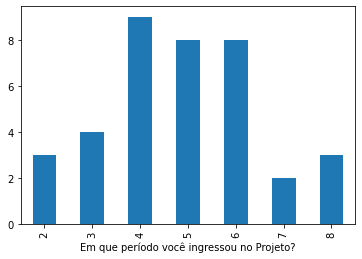

In [16]:
mape = {
    "Segundo Período": 2,
    "Terceiro Período": 3,
    "Quarto Período": 4,
    "Quinto Período": 5,
    "Sexto Período": 6,
    "Sétimo Período": 7,
    "Oitavo Período": 8,
}

dados['period_entry'] = dados['Em que período você ingressou no Projeto?'].apply(lambda x: mape[x])

a = dados.groupby('period_entry')[['period_entry']].count().plot.bar(legend=False)
a.set_xlabel("Em que período você ingressou no Projeto?")

In [17]:
print(f"a média de periodo de ingresso é {dados['period_entry'].mean()}")

a média de periodo de ingresso é 4.864864864864865


### Verificando a média de pessoas para a indicação

In [18]:
indicacao = dados['Na sua opinião, ter uma indicação de alguma pessoa (envolvida, ou não, nesse projeto), te proporcionou o ingresso de seu primeiro projeto?'].dropna()

In [19]:
print(f"a média de indicação para o trabalho ficou em torno de {indicacao.mean()}")

a média de indicação para o trabalho ficou em torno de 2.75


Text(0.5, 0, 'Ter uma indicação de alguma pessoa, te proporcionou o ingresso de seu primeiro projeto?')

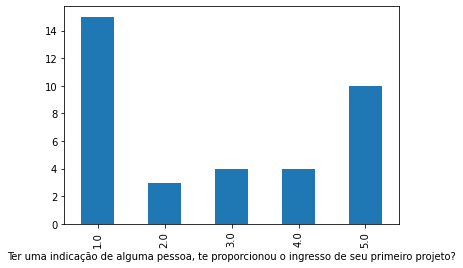

In [20]:
col = 'Na sua opinião, ter uma indicação de alguma pessoa (envolvida, ou não, nesse projeto), te proporcionou o ingresso de seu primeiro projeto?'

b = dados.groupby(col)[[col]].count().plot.bar(legend=False)
b.set_xlabel("Ter uma indicação de alguma pessoa, te proporcionou o ingresso de seu primeiro projeto?")

In [21]:
significancia = 0.05

# Testes de Hipóteses

$t={\frac  {{\bar  {x}}-\mu _{0}}{{\tfrac  {s}{{\sqrt  {n}}}}}}$

Em que:

- ${\displaystyle {\bar {x}}}$: Média da amostra;
- ${\mu _{0}}$: hipótese de média populacional;
- s: Desvio padrão amostral;
- n: Tamanho da amostra.

## Teste de hipótese para a importância média de indicação no primeiro projeto

* $H_0$: a média de indicações é 3 (mais ou menos importante)
* $H_1$: a média de indicações é diferente de 3 (mais ou menos importante)

In [22]:
from scipy.stats.mstats import ttest_1samp

p_value = ttest_1samp(indicacao, popmean=3).pvalue
print(p_value)
if p_value <= significancia:
    print("Rejeita a hipótese nula H0, aceita a alternativa")
else:
    print("Falha em rejeitar a hipótese nula H0, rejeita a alternativa")

0.3918158473231439
Falha em rejeitar a hipótese nula H0, rejeita a alternativa


## Teste de hipótese para a média de período de ingresso do primeiro projeto

- $H_0$: a média de ingresso é 5° período
- $H_1$: a média de ingresso é diferente de 5° período

In [23]:
p_value = ttest_1samp(dados['period_entry'], popmean=5).pvalue
print(p_value)
if p_value <= significancia:
    print("Rejeita a hipótese nula H0, aceita a alternativa")
else:
    print("Falha em rejeitar a hipótese nula H0, rejeita a alternativa")

0.6146780481361247
Falha em rejeitar a hipótese nula H0, rejeita a alternativa
